In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preparation

In [2]:
csv = pd.read_csv('data/absita_2018_training.csv', sep=';')
# there are no NAs
print (csv.dropna().shape == csv.shape)
display(csv.head())

True


,sentence_id,cleanliness_presence,cleanliness_positive,cleanliness_negative,comfort_presence,comfort_positive,comfort_negative,amenities_presence,amenities_positive,amenities_negative,...,wifi_presence,wifi_positive,wifi_negative,location_presence,location_positive,location_negative,other_presence,other_positive,other_negative,sentence
0,1240343993,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Il rumore di martello e trapano di un operaio ...
1,1240351476,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Stanza enorme e pulita, con letto comodissimo."
2,1240347600,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,"Camera spaziosa, letti largho e comodi, colazi..."
3,1240350812,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Gli asciugamani fornitici presentavano dei buchi
4,1240345146,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"L'hotel avrebbe bisogno di una ripulita, non t..."


In [3]:
df_multilabel = pd.read_csv('data/df_multilabel.csv')
display(df_multilabel)


df_multiclass = pd.read_csv('data/df_multiclass.csv')
# binary classification dataframe
display(df_multiclass)


,sentence,cleanliness_presence,comfort_presence,amenities_presence,staff_presence,value_presence,wifi_presence,location_presence,other_presence
0,Il rumore di martello e trapano di un operaio ...,0,1,0,0,0,0,0,0
1,"Stanza enorme e pulita, con letto comodissimo.",1,1,0,0,0,0,0,0
2,"Camera spaziosa, letti largho e comodi, colazi...",0,1,1,1,0,0,0,0
3,Gli asciugamani fornitici presentavano dei buchi,0,1,0,0,0,0,0,0
4,"L'hotel avrebbe bisogno di una ripulita, non t...",1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6332,"Minibar in camera con bevande gratis, rinnovat...",0,0,1,0,0,0,0,0
6333,La posizione e la facilità di accesso alla tan...,0,0,0,0,0,0,1,0
6334,zona vicino la mergellina e il lungomare,0,0,0,0,0,0,1,0
6335,forse prenotando con largo anticipo le tariffe...,0,0,0,0,1,0,0,0


,sentence,cleanliness,comfort,amenities,staff,value,wifi,location,other
0,Il rumore di martello e trapano di un operaio ...,neutral,negative,neutral,neutral,neutral,neutral,neutral,neutral
1,"Stanza enorme e pulita, con letto comodissimo.",positive,positive,neutral,neutral,neutral,neutral,neutral,neutral
2,"Camera spaziosa, letti largho e comodi, colazi...",neutral,positive,positive,positive,neutral,neutral,neutral,neutral
3,Gli asciugamani fornitici presentavano dei buchi,neutral,negative,neutral,neutral,neutral,neutral,neutral,neutral
4,"L'hotel avrebbe bisogno di una ripulita, non t...",negative,positive,neutral,neutral,neutral,neutral,neutral,neutral
...,...,...,...,...,...,...,...,...,...
6332,"Minibar in camera con bevande gratis, rinnovat...",neutral,neutral,positive,neutral,neutral,neutral,neutral,neutral
6333,La posizione e la facilità di accesso alla tan...,neutral,neutral,neutral,neutral,neutral,neutral,positive,neutral
6334,zona vicino la mergellina e il lungomare,neutral,neutral,neutral,neutral,neutral,neutral,positive,neutral
6335,forse prenotando con largo anticipo le tariffe...,neutral,neutral,neutral,neutral,negative,neutral,neutral,neutral


# Data visualization

classes are imbalanced

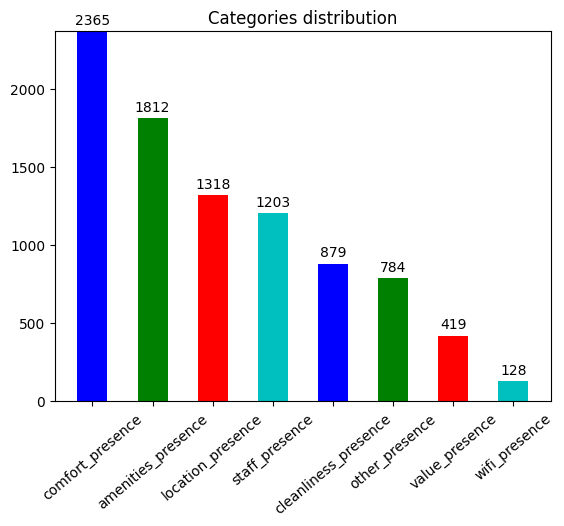

In [5]:
barchart_dict = {}
for col in df_multilabel.columns[1:]:
    barchart_dict.update({col: len(df_multilabel[df_multilabel[col] == 1])})

Dictionary_Length = len(barchart_dict)
Max_Key_Length = 20
Sorted_Dict_Values = sorted(barchart_dict.values(), reverse=True)
Sorted_Dict_Keys = sorted(barchart_dict, key=barchart_dict.get, reverse=True)
for i in range(0, Dictionary_Length):
    Key = Sorted_Dict_Keys[i]
    Key = Key[:Max_Key_Length]
    Sorted_Dict_Keys[i] = Key
X = np.arange(Dictionary_Length)
Colors = ('b', 'g', 'r', 'c')  # blue, green, red, cyan

Figure = plt.figure()
ax = Figure.add_subplot(1, 1, 1)
for i in range(0, Dictionary_Length):
    rects1 = ax.bar(X[i], Sorted_Dict_Values[i], align='center', width=0.5, color=Colors[i % len(Colors)])
    ax.bar_label(rects1, padding=3)

ax.set_title('Categories distribution')

ax.set_xticks(X)
xtickNames = ax.set_xticklabels(Sorted_Dict_Keys)
plt.setp(Sorted_Dict_Keys)
plt.xticks(rotation=40)
ymax = max(Sorted_Dict_Values) + 1
plt.ylim(0, ymax)

plt.show()


reviews sentiments are imbalanced

<Figure size 640x480 with 0 Axes>

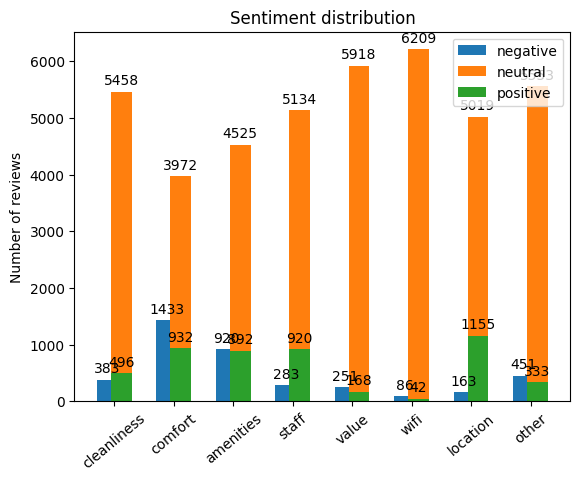

In [ ]:
Figure = plt.figure()
barchart_dict = {}
for col in df_multiclass.columns[1:]:
    barchart_dict.update({col: df_multiclass.groupby(df_multiclass[col]).size().values})

labels = list(barchart_dict.keys())
negative = [i[0] for i in barchart_dict.values()]
neutral = [i[1] for i in barchart_dict.values()]
positive = [i[2] for i in barchart_dict.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, negative, width, label='negative')
rects2 = ax.bar(x + width/3, neutral, width, label='neutral')
rects3 = ax.bar(x + width/3, positive, width, label='positive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of reviews')
ax.set_title('Sentiment distribution')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)



plt.xticks(rotation=40)

plt.show()
    



check reviews that have most categories

In [6]:
sentiment_columns = [i for i in csv.columns if i not in df_multilabel.columns]
csv[sentiment_columns].isin([1]).sum(axis=1).sort_values(ascending=False)


5008    9
5234    8
6029    8
4636    8
1530    8
       ..
6336    1
198     0
5261    0
4738    0
4296    0
Length: 6337, dtype: int64

following reviews have both positive and negative revews

In [7]:
for i in range(1, csv.columns.size-1, 3):
    print(np.where(csv.iloc[:, i] < csv.iloc[:, i+1]+csv.iloc[:, i+2]))


(array([1591, 1757, 1784, 1923, 2357, 3400, 4207, 5589]),)
(array([ 497,  526,  659,  715, 1039, 1041, 1163, 1281, 1290, 1330, 1390,
       1414, 1684, 1707, 2163, 2205, 2249, 2468, 2731, 3401, 3427, 3566,
       3635, 3657, 3800, 3835, 3846, 3849, 4153, 4515, 4557, 4634, 4704,
       4788, 4929, 5008, 5190, 5385, 5632, 5888, 6116, 6161, 6236, 6293,
       6304, 6317]),)
(array([  80,  121,  213,  222,  357,  386,  774, 1170, 1423, 1531, 1656,
       2045, 2091, 2103, 2140, 2196, 2260, 2447, 2792, 2845, 3000, 3019,
       3294, 3302, 3359, 3380, 3389, 3535, 3659, 3688, 3950, 3966, 3991,
       4012, 4133, 4199, 4238, 4419, 4431, 4573, 4634, 4660, 4800, 4861,
       4885, 4898, 5011, 5105, 5221, 5329, 5498, 5927, 6121, 6183, 6280,
       6287]),)
(array([  28,  592, 1210, 1340, 1435, 2130, 2374, 2604, 3157, 3230, 3339,
       3388, 3737, 4099, 4477, 5178, 5433]),)
(array([6335]),)
(array([1834]),)
(array([  59,   97,  186,  291,  327,  384,  426,  762,  999, 1607, 1671,
       1731, 238

longest and shortest reviews

In [9]:
longest_review = csv['sentence'][np.argmax(csv['sentence'].str.count(' ') + 1)]
shortest_review = csv['sentence'][np.argmin(csv['sentence'].str.count(' ') + 1)]

print(longest_review, len(longest_review))
print('\n')
print(shortest_review, len(shortest_review))


La mattina dopo avermi svegliato sono andata alla reception per chiedere della colazione... Non ho trovato niente e alla richiesta di due caffè il tizio alla reception molto scorbutico mi ha detto che costava due euro... allora io ho chiesto come mai la colazione non fosse inclusa visto che nella maggior parte dei b e b quando paghi la stanza la colazione è inclusa...  la sua risposta è stata che nel prezzo 5o eur o  la colazione non è compresa... quindi sono andata in camera a prendere i soldi, sono rimandata alla reception e c era la ragazza a cui ho chiesto il caffè, lui da dietro alla reception ha ridetto  due euro per i caffe  io ho detto ho capito e gli ho messo i soldi sul bancone e da lì ha iniziato ad alternarsi e ad insultarmi per il modo in cui gli avevo dato i soldi  Ha anche minacciato Un esperienza da non rifare assplutamente 851


Elegante 8
